In [3]:
import pandas as pd
import json

In [38]:
%matplotlib inline

# Load data from json

In [4]:
DATA_PATH = 'data/lesetagebuch-florian.json'
df = pd.read_json(DATA_PATH)
df

,entries,name,url,username
0,"{'pinned': False, 'id': 38445, 'user': {'usern...",Florian,/von/florian,florian
1,"{'pinned': False, 'id': 38441, 'user': {'usern...",Florian,/von/florian,florian
2,"{'pinned': False, 'id': 38406, 'user': {'usern...",Florian,/von/florian,florian
3,"{'pinned': False, 'id': 38405, 'user': {'usern...",Florian,/von/florian,florian
4,"{'pinned': False, 'id': 38338, 'user': {'usern...",Florian,/von/florian,florian
...,...,...,...,...
148,"{'pinned': False, 'id': 1457, 'user': {'userna...",Florian,/von/florian,florian
149,"{'pinned': False, 'id': 1019, 'user': {'userna...",Florian,/von/florian,florian
150,"{'pinned': False, 'id': 1004, 'user': {'userna...",Florian,/von/florian,florian
151,"{'pinned': False, 'id': 992, 'user': {'usernam...",Florian,/von/florian,florian


In [6]:
with open(DATA_PATH) as fp:
    books = json.load(fp)


# Set up dataframe with desired structure and types

In [13]:
books['entries'][0]

{'book': {'author': {'id': 4662,
   'name': 'J.L. Carr',
   'url': '/autor/j-l-carr'},
  'id': 9538,
  'pages': 144,
  'title': 'Ein Monat auf dem Land',
  'url': '/buch/ein-monat-auf-dem-land'},
 'book_type': 'book',
 'comment': 'Eine kurze Geschichte. Schön geschrieben und angenehm wehmütig. Nicht aktiv traurig, eher nachdenklich. Ich mochte es sehr.',
 'date': '2020-10-18',
 'id': 38445,
 'pinned': False,
 'private': False,
 'rating': 4,
 'type': 'finished',
 'url': '/eintrag/38445',
 'user': {'username': 'florian'}}

In [28]:
drop_keys = ['book', 'user']
books_flat = [
    {
        **{k:v for k, v in book.items() if k not in drop_keys},
        **{
            'author': book['book']['author']['name'],
            'title': book['book']['title'],
            'book_pages': book['book']['pages'],
            'username': book['user']['username']
         }
    }
    for book in books['entries']
]

df = pd.DataFrame(books_flat)
df['date'] = df.date.str.replace('00', '01')  # fallback dates were day not specified
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df

,author,book_pages,book_type,comment,date,id,pinned,private,rating,title,type,url,username
0,J.L. Carr,144,book,Eine kurze Geschichte. Schön geschrieben und a...,2020-10-18,38445,False,False,4.0,Ein Monat auf dem Land,finished,/eintrag/38445,florian
1,James Clear,320,book,James Clear describes how habits work in your ...,2020-10-17,38441,False,False,4.0,Atomic Habits,finished,/eintrag/38441,florian
2,André Kostolany,240,audio_book,Ein Hauch vergangener Zeiten. Angenehmes Hörbu...,2020-06-30,38406,False,False,4.0,"Die Kunst, über Geld nachzudenken",finished,/eintrag/38406,florian
3,Robert Harris,320,audio_book,I just finished the Von Braun biography 2 week...,2020-10-12,38405,False,False,4.0,V2,finished,/eintrag/38405,florian
4,Morgan Housel,256,book,I don't know how exactly to categorize this bo...,2020-10-06,38338,False,False,5.0,The Psychology of Money,finished,/eintrag/38338,florian
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Sam Williams,264,book,Some kind of biography about Richard Stallman ...,2013-02-12,1457,False,False,4.0,Free as in Freedom,finished,/eintrag/1457,florian
149,Malcolm Gladwell,304,book,"Interessant zu erfahren, dass manchmal eine sp...",2013-01-23,1019,False,False,3.0,Blink!,finished,/eintrag/1019,florian
150,Volker Kutscher,560,book,Tolle Atmosphäre im Berlin der 1920er Jahre. S...,2013-01-07,1004,False,False,4.0,Der nasse Fisch,finished,/eintrag/1004,florian
151,Joseph Campbell,418,book,None,2015-01-19,992,False,False,NaN,The Hero with a Thousand Faces,wished,/eintrag/992,florian


In [27]:
df.dtypes

author                object
book_pages             int64
book_type             object
comment               object
date          datetime64[ns]
id                     int64
pinned                  bool
private                 bool
rating               float64
title                 object
type                  object
url                   object
username              object
dtype: object

#  Mostly paper books, few audio books

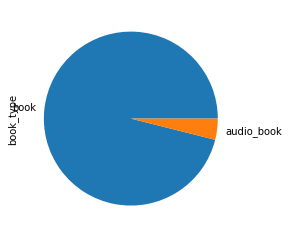

In [101]:
df.book_type.value_counts().plot(kind='pie', leg)

# How many books per year

In [68]:
yearly_stats = (
    df.assign(
        year=lambda entry: entry['date'].dt.year
    )
    .groupby('year')['title', 'book_pages']
).agg({
    'title': 'count',
    'book_pages': 'sum'
})
yearly_stats

,book_pages,title
year,,
2013,6237,24
2014,4688,13
2015,3745,10
2016,6320,16
2017,8161,23
2018,6970,21
2019,9727,29
2020,6939,17


## How many _books_ have I read each year?

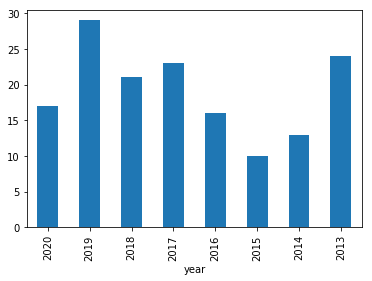

In [74]:
yearly_stats['title'].sort_index(ascending=False).plot(kind='bar')

## How many _pages_ have I read each year?

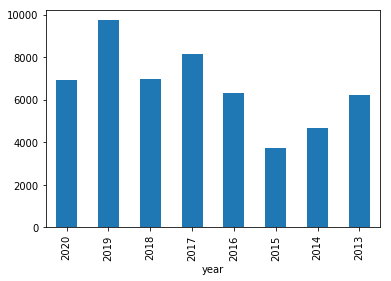

In [75]:
yearly_stats['book_pages'].sort_index(ascending=False).plot(kind='bar')

# What's the month where I read the most?

In [80]:
years = df.assign(
    year=lambda entry: entry['date'].dt.year
)['year']
num_years = len(years.unique())
num_years

8

In [95]:
monthly_stats = (
    df.assign(
        year=lambda entry: entry['date'].dt.month
    )
    .groupby('year')['title', 'book_pages']
).agg({
    'title': 'count',  # FIXME: I need the mean of the count instead!
    'book_pages': 'mean'
}).rename(
    columns={
        'title': 'books_num_total',
        'book_pages': 'pages_per_month'
    }
).assign(
    books_per_month=lambda entry: (entry['books_num_total'] / num_years)
)[
    ['pages_per_month', 'books_per_month']
]
monthly_stats

,pages_per_month,books_per_month
year,,
1,299.823529,2.125
2,382.941176,2.125
3,394.500000,0.750
4,419.444444,1.125
5,423.000000,1.000
6,426.800000,0.625
7,315.777778,1.125
8,331.181818,1.375
9,413.000000,2.125


## December is when I read most books
...to hit the reading goal?

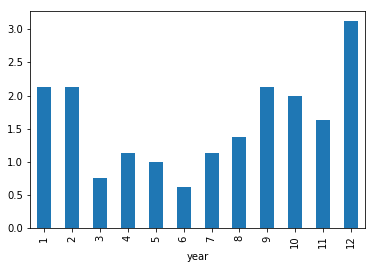

In [97]:
monthly_stats['books_per_month'].sort_index().plot(kind='bar')

## However, books read in December are shorter on average
Is it easier to hit the reading goal that way?

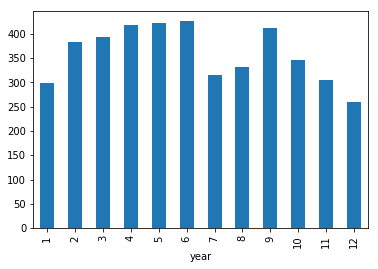

In [98]:
monthly_stats['pages_per_month'].sort_index().plot(kind='bar')

In [32]:
# Do I like the books I read?

# Ratings

/Users/flo/miniconda3/envs/learn-ml/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


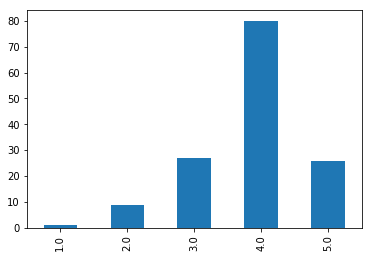

In [108]:
df_rated = (
    df
    [df.rating.notnull()]
    [df.rating>0]
)
df_rated.rating.value_counts().sort_index().plot(kind='bar')

In [104]:
# Odd: some non-rated books have rating None, some have rating 0.0
print(len(df[df.rating.isna()]))
print(len(df[df.rating.isnull()]))
print(len(df[df.rating==0.0]))
df[df.rating==0.0]

3
3
7


,author,book_pages,book_type,comment,date,id,pinned,private,rating,title,type,url,username
11,Steven S. Skiena,445,book,"Read this as part of our ""Data Science Study G...",2020-07-13,37486,False,False,0.0,The Data Science Design Manual,finished,/eintrag/37486,florian
55,Ben Aaronovitch,395,book,"After a couple of non-fiction books, I wanted ...",2018-11-24,29202,False,False,0.0,Rivers Of London,finished,/eintrag/29202,florian
57,Ari Shavit,512,book,None,2018-09-17,27938,False,False,0.0,My Promised Land,started,/eintrag/27938,florian
63,Wolfram Wette,288,book,"Karl Jäger, von seinen Nachbarn als feinsinnig...",2018-02-19,22414,False,False,0.0,Karl Jäger,finished,/eintrag/22414,florian
64,Hannah Arendt,448,book,"Es gibt so viel aus der deutschen Geschichte, ...",2018-02-11,22299,False,False,0.0,Eichmann in Jerusalem: Ein Bericht von der Ban...,finished,/eintrag/22299,florian
65,Ernst Klee,191,book,"Spannende Rechercheergebnisse, wie die deutsch...",2018-01-25,22298,False,False,0.0,Persilscheine und falsche Pässe,finished,/eintrag/22298,florian
93,Jeffrey Eugenides,596,book,None,2016-11-09,15190,False,False,0.0,Middlesex,wished,/eintrag/15190,florian


## Distribution of book lengths

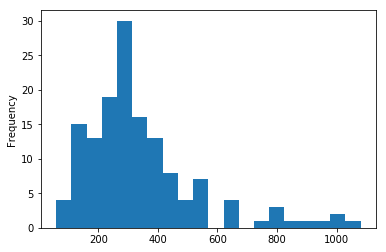

In [117]:
df_rated.book_pages.plot.hist(bins=20)

## Do I rate longer books higher?

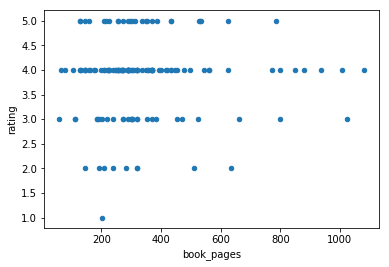

In [120]:
df_rated.plot.scatter(x='book_pages', y='rating')

# Split books in short / medium / long

In [165]:
# auto split is not to my taste. "long" should start later
pd.qcut(df.book_pages, 3).value_counts()

(58.999, 256.0]      54
(366.667, 1080.0]    51
(256.0, 366.667]     48
Name: book_pages, dtype: int64

In [167]:
# I want to call the middle 50% "Medium" and distribute the other lengths equally to the sides
pd.qcut(df.book_pages, [0, 0.25, 0.75, 1.]).value_counts()

(222.0, 416.0]     76
(58.999, 222.0]    39
(416.0, 1080.0]    38
Name: book_pages, dtype: int64

In [169]:
# Now actually assign some names
book_length = pd.qcut(df.book_pages, [0, 0.25, 0.75, 1.], labels=['Short', 'Medium', 'Long'])
book_length.value_counts()

Medium    76
Short     39
Long      38
Name: book_pages, dtype: int64

# How do ratings vary by book length and paper vs. audio book (pivot table!)

In [172]:
rating_per_length_and_type = df.assign(
    book_length=book_length
).pivot_table(
    values='rating',
    index='book_length',
    columns='book_type'
)
rating_per_length_and_type

book_type,audio_book,book
book_length,,
Short,NaN,3.594595
Medium,4.25,3.763889
Long,4.00,3.457143


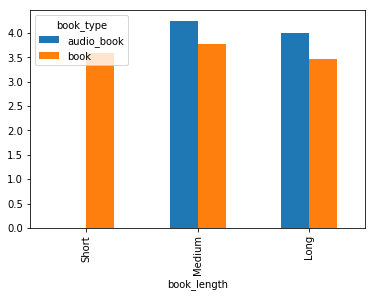

In [174]:
rating_per_length_and_type.plot.bar()

In [126]:
pages_per_rating = df_rated[
    ['rating', 'book_pages']
].groupby('rating').agg(['mean', 'std']).fillna(0)
pages_per_rating

book_pages            
              mean         std
rating                        
1.0     202.000000    0.000000
2.0     317.555556  159.232622
3.0     341.740741  211.662757
4.0     349.175000  208.061747
5.0     340.115385  160.006082

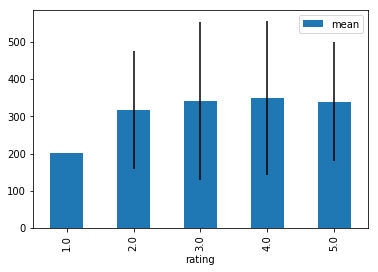

In [130]:
pages_per_rating.book_pages.plot.bar(y='mean', yerr='std')

# Do I write longer comments for longer books?

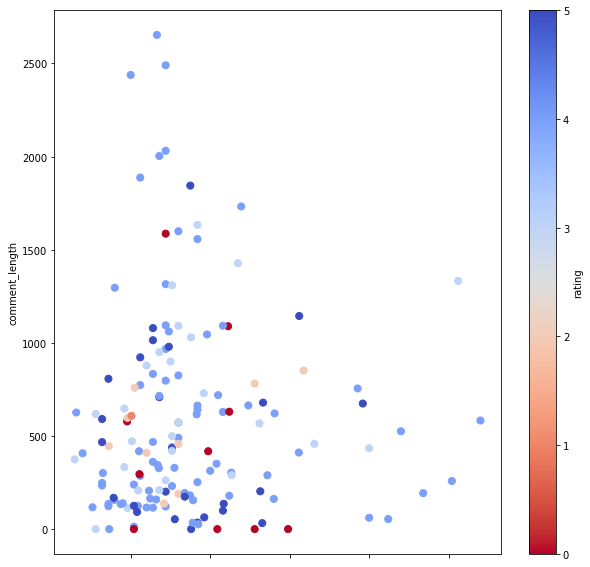

In [150]:
df.assign(
    comment_length=lambda entry: entry.comment.str.len()
).fillna(0).plot.scatter(
    x='book_pages',
    y='comment_length',
    c='rating',
    colormap='coolwarm_r',
    figsize=(10,10),
    s=50  # marker size
)

# TODO: Compare language and genre preferences over time
Currently not part of the data

In [33]:
# TODO: Ask Daniel to include tags in export AND tag all books with language and genre